In [247]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import sklearn
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label

In [2]:
# Import car and non car images to train classifiers
cars = glob.glob('./vehicles/*/*.png')
notcars = glob.glob('./non-vehicles/*/*.png')

car_img = []
notcar_img = []
y = []
X_path = []

for car in cars:
#    image = mpimg.imread(car)
#    car_img.append(image)
    y.append(1)
    X_path.append(car)

for notcar in notcars:
#    image = mpimg.imread(notcar)
#    notcar_img.append(image)
    y.append(0)
    X_path.append(notcar)

X_path, y = sklearn.utils.shuffle(X_path,y)
labels = {0: "Not car", 1: "Car"}

(64, 64, 3)


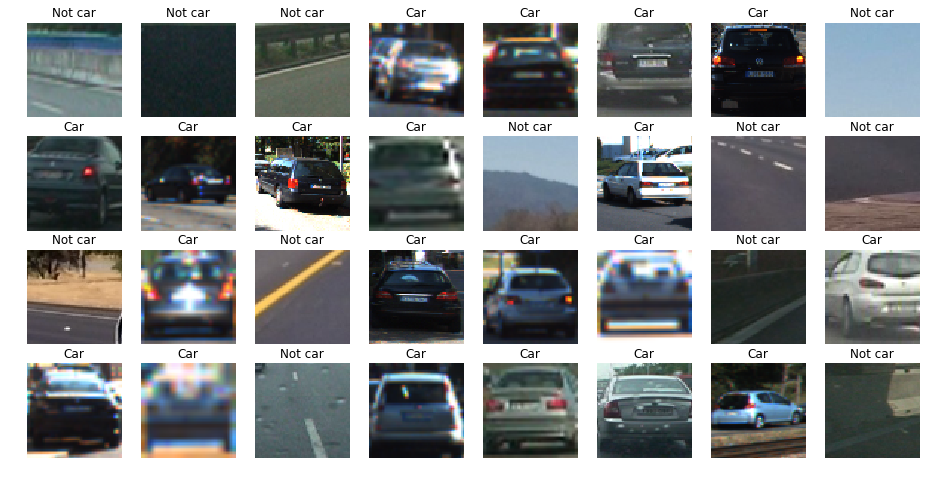

In [3]:
# Visualize the data
print(np.shape(mpimg.imread(X_path[0])))
fig, axs = plt.subplots(4,8, figsize=(16, 8))
axs = axs.ravel()

for i in range(32):
    image = mpimg.imread(X_path[i])
    axs[i].axis('off')
    axs[i].set_title(labels[y[i]])
    axs[i].imshow(image)

In [4]:
# HOG Feature extraction

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True, block_norm='L2-Hys',
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=True, block_norm='L2-Hys',
                       visualise=vis, feature_vector=feature_vec)
        return features
    
def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0, img_paths=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        if img_paths:
            image = mpimg.imread(file)
        else:
            image = np.copy(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

C:\Users\User\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:144: RuntimeWarning: invalid value encountered in sqrt
  image = np.sqrt(image)
C:\Users\User\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:190: RuntimeWarning: invalid value encountered in remainder
  orientations, orientation_histogram)
C:\Users\User\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:17: RuntimeWarning: invalid value encountered in minimum
  out = np.minimum(out, 0.2)


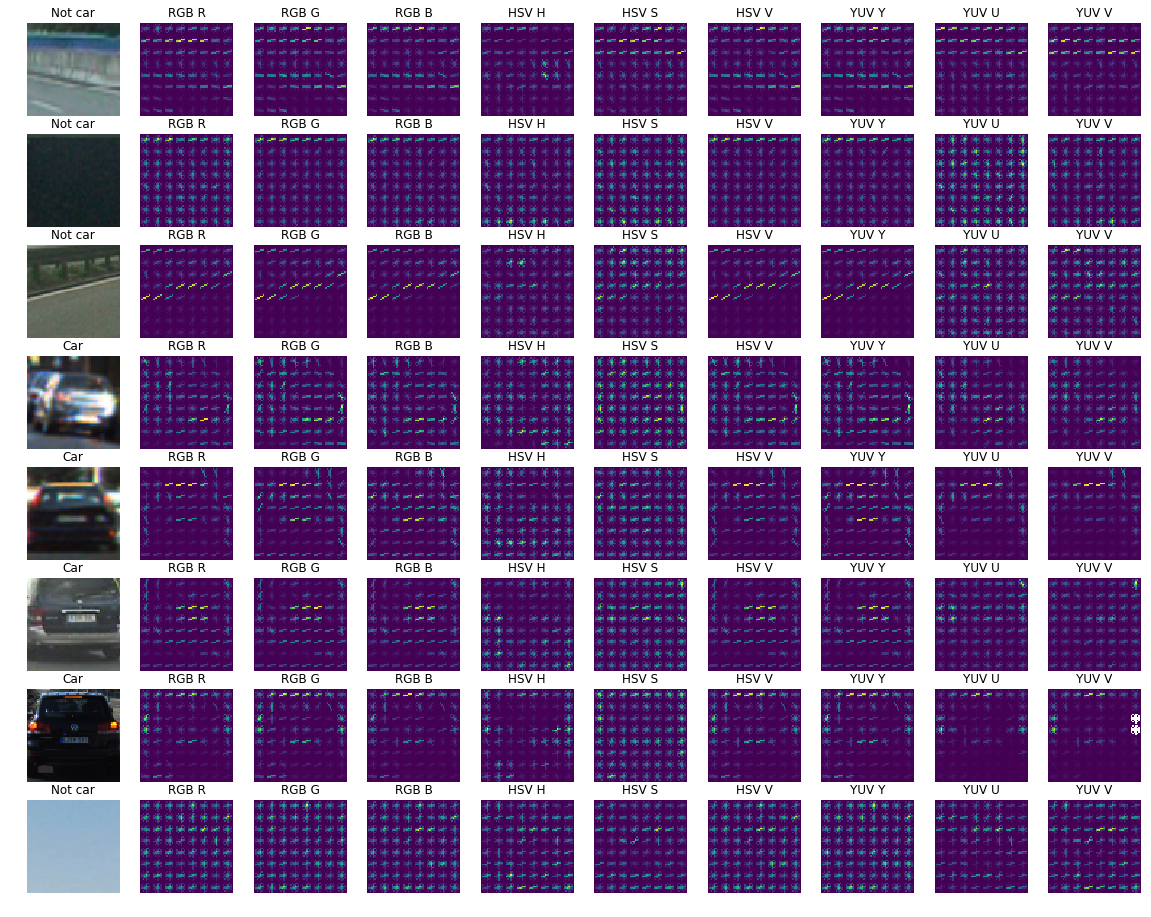

In [5]:
# Visualize HOG Features
fig, axs = plt.subplots(8,10, figsize=(20, 16))

for i in range(8):
    for j in range(10):
        axs[i][j].axis('off')
    image = mpimg.imread(X_path[i])
    #gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) 
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    features_rgb_r, hog_image_rgb_r = get_hog_features(image[:,:,0], 9, 8, 2, vis=True, feature_vec=True)
    features_rgb_g, hog_image_rgb_g = get_hog_features(image[:,:,1], 9, 8, 2, vis=True, feature_vec=True)
    features_rgb_b, hog_image_rgb_b = get_hog_features(image[:,:,2], 9, 8, 2, vis=True, feature_vec=True)
    features_hsv_h, hog_image_hsv_h = get_hog_features(hsv[:,:,0], 9, 8, 2, vis=True, feature_vec=True)
    features_hsv_s, hog_image_hsv_s = get_hog_features(hsv[:,:,1], 9, 8, 2, vis=True, feature_vec=True)
    features_hsv_v, hog_image_hsv_v = get_hog_features(hsv[:,:,2], 9, 8, 2, vis=True, feature_vec=True)
    features_yuv_y, hog_image_yuv_y = get_hog_features(yuv[:,:,0], 9, 8, 2, vis=True, feature_vec=True)
    features_yuv_u, hog_image_yuv_u = get_hog_features(yuv[:,:,1], 9, 8, 2, vis=True, feature_vec=True)
    features_yuv_v, hog_image_yuv_v = get_hog_features(yuv[:,:,2], 9, 8, 2, vis=True, feature_vec=True)
    axs[i,0].imshow(image)
    axs[i,0].set_title(labels[y[i]])
    axs[i,1].imshow(hog_image_rgb_r)
    axs[i,1].set_title("RGB R")
    axs[i,2].imshow(hog_image_rgb_g)
    axs[i,2].set_title("RGB G")
    axs[i,3].imshow(hog_image_rgb_b)
    axs[i,3].set_title("RGB B")
    axs[i,4].imshow(hog_image_hsv_h)
    axs[i,4].set_title("HSV H")
    axs[i,5].imshow(hog_image_hsv_s)
    axs[i,5].set_title("HSV S")
    axs[i,6].imshow(hog_image_hsv_v)
    axs[i,6].set_title("HSV V")
    axs[i,7].imshow(hog_image_yuv_y)
    axs[i,7].set_title("YUV Y")
    axs[i,8].imshow(hog_image_yuv_u)
    axs[i,8].set_title("YUV U")
    axs[i,9].imshow(hog_image_yuv_v)
    axs[i,9].set_title("YUV V")

In [6]:
### Extract HOG features using a variety of different parameters

hog_parameters={0: ['RGB', 9, 8, 2],
                1: ['RGB', 12, 8, 2],
                2: ['RGB', 9, 16, 2],
                3: ['RGB', 12, 16, 2],
                4: ['RGB', 12, 16, 4],
                5: ['HSV', 9, 8, 2],
                6: ['HSV', 12, 8, 2],
                7: ['HSV', 9, 16, 2],
                8: ['HSV', 12, 16, 2],
                9: ['HSV', 12, 16, 4],
                #10: ['HSV', 15, 8, 2],
                #11: ['HSV', 15, 16, 2],
                #12: ['HSV', 15, 8, 4]
                10: ['YCrCb', 9, 8, 2],
                11: ['YCrCb', 12, 8, 4],
                12: ['YCrCb', 9, 16, 2],
                13: ['YCrCb', 12, 16, 2],
                14: ['YCrCb', 12, 16, 4]
               }
hog_features = []

for i in range(len(hog_parameters)):
    print("Parameters: ", hog_parameters[i])
    t1 = time.time()
    features_i = extract_features(X_path, cspace=hog_parameters[i][0], orient=hog_parameters[i][1], 
                        pix_per_cell=hog_parameters[i][2], cell_per_block=hog_parameters[i][3], 
                        hog_channel='ALL')
    hog_features.append(features_i)
    t2 = time.time()
    print(round(t2-t1, 2), 'Seconds to extract HOG features...')
    print('')
                                  
    

Parameters:  ['RGB', 9, 8, 2]
166.03 Seconds to extract HOG features...

Parameters:  ['RGB', 12, 8, 2]
156.6 Seconds to extract HOG features...

Parameters:  ['RGB', 9, 16, 2]
111.76 Seconds to extract HOG features...

Parameters:  ['RGB', 12, 16, 2]
115.15 Seconds to extract HOG features...

Parameters:  ['RGB', 12, 16, 4]
105.41 Seconds to extract HOG features...

Parameters:  ['HSV', 9, 8, 2]
159.28 Seconds to extract HOG features...

Parameters:  ['HSV', 12, 8, 2]
170.5 Seconds to extract HOG features...

Parameters:  ['HSV', 9, 16, 2]
127.37 Seconds to extract HOG features...

Parameters:  ['HSV', 12, 16, 2]
130.05 Seconds to extract HOG features...

Parameters:  ['HSV', 12, 16, 4]
119.99 Seconds to extract HOG features...

Parameters:  ['YCrCb', 9, 8, 2]
175.49 Seconds to extract HOG features...

Parameters:  ['YCrCb', 12, 8, 4]
169.94 Seconds to extract HOG features...

Parameters:  ['YCrCb', 9, 16, 2]
143.22 Seconds to extract HOG features...

Parameters:  ['YCrCb', 12, 16, 2]

In [91]:
scores = []
for i in range(len(hog_parameters)):
    print("Parameters: ", hog_parameters[i])
    # Split up data into randomized training and test sets
    X = hog_features[i]
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
    # Fit a per-column scaler
    #X_scaler = StandardScaler().fit(X_train)
    # Apply the scaler to X
    #X_train = X_scaler.transform(X_train)
    #X_test = X_scaler.transform(X_test)

    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    # Check the score of the SVC
    score = round(svc.score(X_test, y_test),4)
    print('Test Accuracy of SVC = ', score)
    print('')
    scores.append(score)

Parameters:  ['RGB', 9, 8, 2]
38.71 Seconds to train SVC...
Test Accuracy of SVC =  0.9361

Parameters:  ['RGB', 12, 8, 2]
42.59 Seconds to train SVC...
Test Accuracy of SVC =  0.9398

Parameters:  ['RGB', 9, 16, 2]
14.46 Seconds to train SVC...
Test Accuracy of SVC =  0.9403

Parameters:  ['RGB', 12, 16, 2]
12.39 Seconds to train SVC...
Test Accuracy of SVC =  0.9561

Parameters:  ['RGB', 12, 16, 4]
6.58 Seconds to train SVC...
Test Accuracy of SVC =  0.96

Parameters:  ['HSV', 9, 8, 2]
23.21 Seconds to train SVC...
Test Accuracy of SVC =  0.9597

Parameters:  ['HSV', 12, 8, 2]
28.81 Seconds to train SVC...
Test Accuracy of SVC =  0.9631

Parameters:  ['HSV', 9, 16, 2]
6.26 Seconds to train SVC...
Test Accuracy of SVC =  0.9682

Parameters:  ['HSV', 12, 16, 2]
8.22 Seconds to train SVC...
Test Accuracy of SVC =  0.9685

Parameters:  ['HSV', 12, 16, 4]
5.01 Seconds to train SVC...
Test Accuracy of SVC =  0.973

Parameters:  ['YCrCb', 9, 8, 2]
26.78 Seconds to train SVC...
Test Accuracy

In [92]:
#Use the feature set with the highest score
best = np.argmax(scores)
print("Best SVC parameters: ", hog_parameters[best])
score = round(svc.score(X_test, y_test),4)
print('Test Accuracy of best SVC = ', score)

X = hog_features[best]
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
# Fit a per-column scaler
#X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
#X_train = X_scaler.transform(X_train)
#X_test = X_scaler.transform(X_test)

# Use a linear SVC 
svc = LinearSVC()
svc.fit(X_train, y_train)

Best SVC parameters:  ['HSV', 12, 16, 4]
Test Accuracy of best SVC =  0.96


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [93]:
n_predict = 25
print('Predictions: ', svc.predict(X_test[0:n_predict]))
print('Labels:      ', np.transpose(y_test[0:n_predict]))

Predictions:  [0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1]
Labels:       [0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1]


In [125]:
# Define a get windows function to get a sliding set of windows according to a y value
def get_windows(img, y, scale, vis=False):
    imshape = img.shape
    image = cv2.resize(img, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
    draw_img = np.copy(image)
    x_pixels = imshape[1]/scale
    window_size = 64
    overlap = 2
    n_windows = int(x_pixels/window_size*overlap)
    windows = []
    boxes = []
    x=0
    y=int(y/scale) - 32
    for i in range(n_windows):
        window = np.array(image[y:y+64,x:x+64,:])
        if vis:
            cv2.rectangle(draw_img, (x,y), (x+64,y+64), (0, 0, 255), 3)
        x=x+int(64/overlap)
        if np.shape(window) == (64, 64, 3):
            windows.append(window)
            boxes.append([(int(x*scale),int(y*scale)),(int((x+64)*scale),int((y+64)*scale))])
    if vis:
        plt.imshow(draw_img)
    return(windows, boxes)
plt.figure(figsize=(16,10))
test_img = mpimg.imread('./test_images/test1.jpg')

(39, 576)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0]


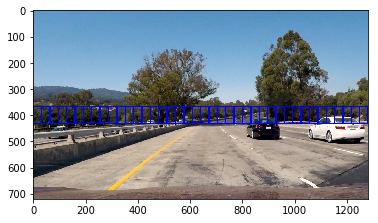

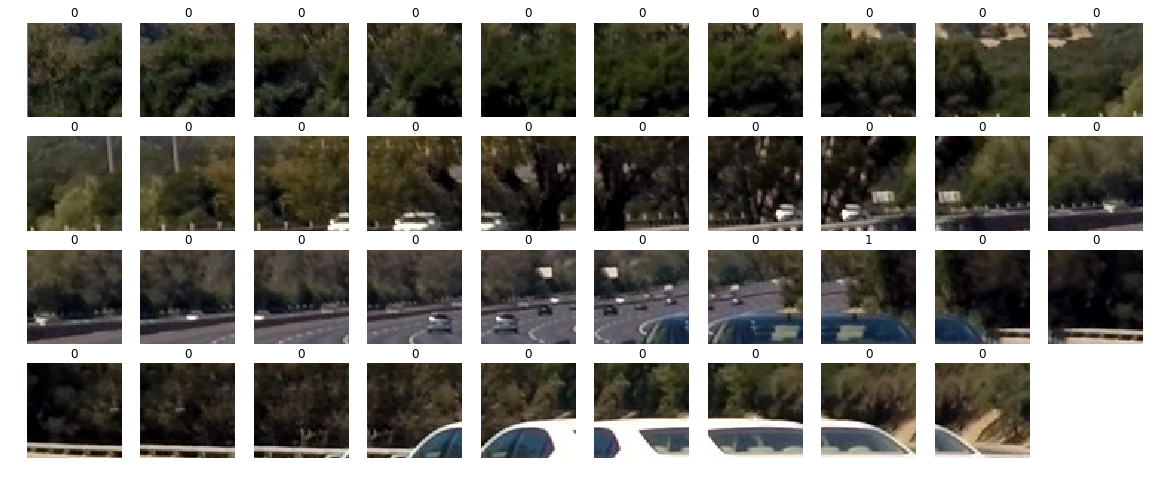

In [184]:
windows, boxes = get_windows(test_img, 400, 1.0, vis=True)
window_features = extract_features(windows, cspace=hog_parameters[best][0], orient=hog_parameters[best][1], 
                        pix_per_cell=hog_parameters[best][2], cell_per_block=hog_parameters[best][3], 
                        hog_channel='ALL', img_paths=False)

#window_features = X_scaler.transform(window_features)
print(np.shape(window_features))

window_predictions = svc.predict(window_features)
print(window_predictions)

fig, axs = plt.subplots(4,10, figsize=(20, 8))
axs = axs.ravel()
#print(boxes)

for i in range(40):
    axs[i].axis('off')
    if i < len(windows):
        axs[i].set_title(window_predictions[i])
        axs[i].imshow(windows[i])

(39, 576)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0]


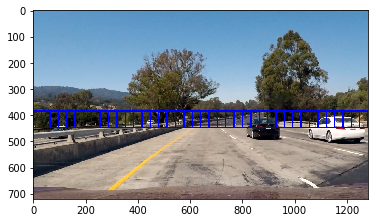

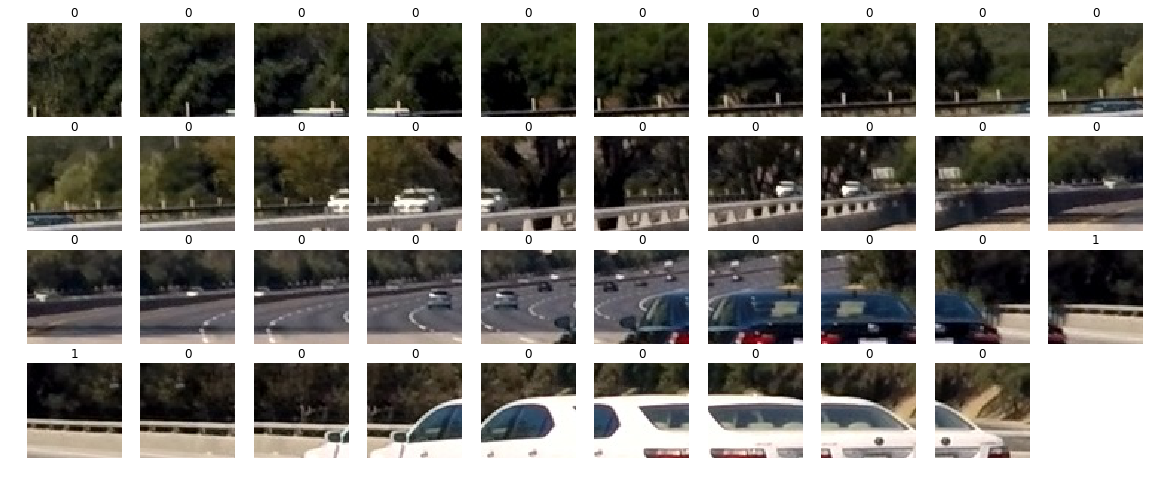

In [138]:
windows, boxes = get_windows(test_img, 416, 1.0, vis=True)
window_features = extract_features(windows, cspace=hog_parameters[best][0], orient=hog_parameters[best][1], 
                        pix_per_cell=hog_parameters[best][2], cell_per_block=hog_parameters[best][3], 
                        hog_channel='ALL', img_paths=False)

#window_features = X_scaler.transform(window_features)
print(np.shape(window_features))

window_predictions = svc.predict(window_features)
print(window_predictions)

fig, axs = plt.subplots(4,10, figsize=(20, 8))
axs = axs.ravel()
#print(boxes)

for i in range(40):
    axs[i].axis('off')
    if i< len(windows):
        axs[i].set_title(window_predictions[i])
        axs[i].imshow(windows[i])

(39, 576)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0]


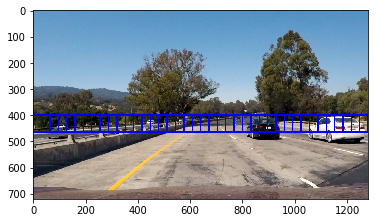

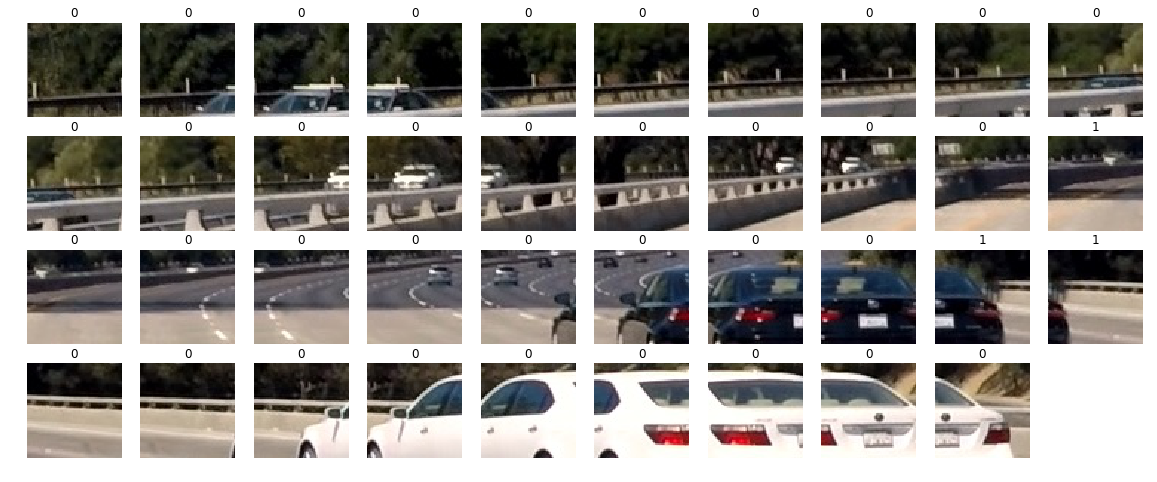

In [139]:
windows, boxes = get_windows(test_img, 432, 1.0, vis=True)
window_features = extract_features(windows, cspace=hog_parameters[best][0], orient=hog_parameters[best][1], 
                        pix_per_cell=hog_parameters[best][2], cell_per_block=hog_parameters[best][3], 
                        hog_channel='ALL', img_paths=False)

#window_features = X_scaler.transform(window_features)
print(np.shape(window_features))

window_predictions = svc.predict(window_features)
print(window_predictions)

fig, axs = plt.subplots(4,10, figsize=(20, 8))
axs = axs.ravel()
#print(boxes)

for i in range(40):
    axs[i].axis('off')
    if i< len(windows):
        axs[i].set_title(window_predictions[i])
        axs[i].imshow(windows[i])

(39, 576)
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0]


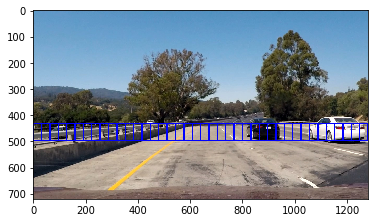

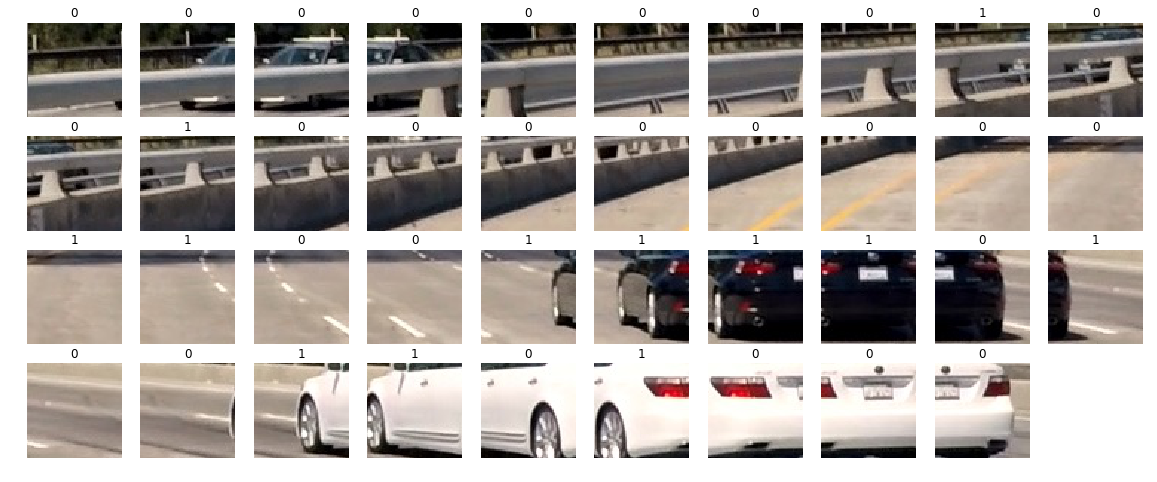

In [140]:
windows, boxes = get_windows(test_img, 464, 1.0, vis=True)
window_features = extract_features(windows, cspace=hog_parameters[best][0], orient=hog_parameters[best][1], 
                        pix_per_cell=hog_parameters[best][2], cell_per_block=hog_parameters[best][3], 
                        hog_channel='ALL', img_paths=False)

#window_features = X_scaler.transform(window_features)
print(np.shape(window_features))

window_predictions = svc.predict(window_features)
print(window_predictions)

fig, axs = plt.subplots(4,10, figsize=(20, 8))
axs = axs.ravel()
#print(boxes)

for i in range(40):
    axs[i].axis('off')
    if i< len(windows):
        axs[i].set_title(window_predictions[i])
        axs[i].imshow(windows[i])

(39, 576)
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0]


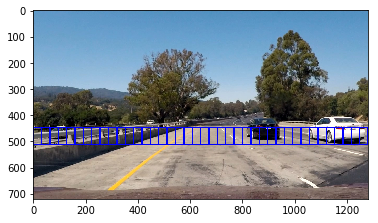

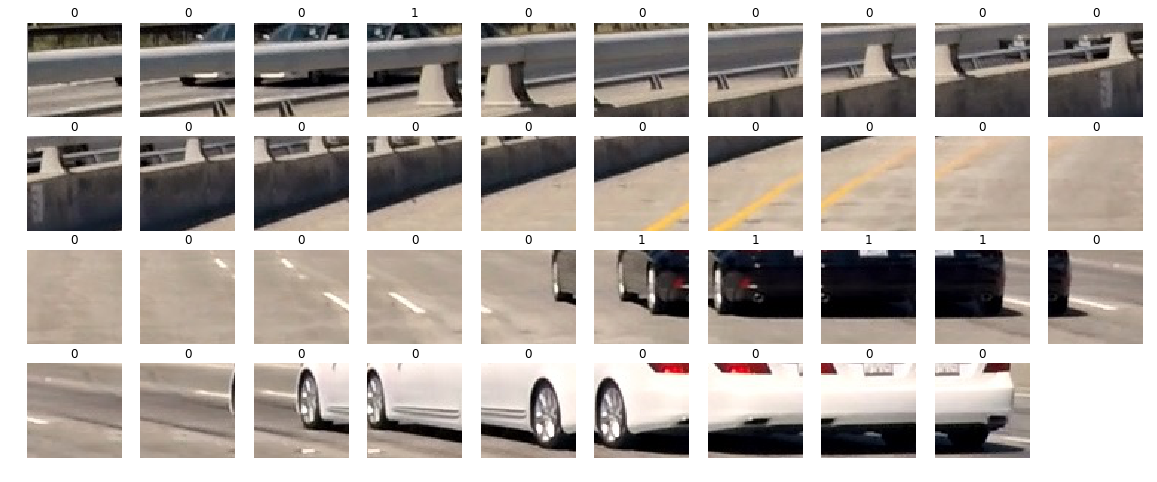

In [141]:
windows, boxes = get_windows(test_img, 480, 1.0, vis=True)
window_features = extract_features(windows, cspace=hog_parameters[best][0], orient=hog_parameters[best][1], 
                        pix_per_cell=hog_parameters[best][2], cell_per_block=hog_parameters[best][3], 
                        hog_channel='ALL', img_paths=False)

#window_features = X_scaler.transform(window_features)
print(np.shape(window_features))

window_predictions = svc.predict(window_features)
print(window_predictions)

fig, axs = plt.subplots(4,10, figsize=(20, 8))
axs = axs.ravel()
#print(boxes)

for i in range(40):
    axs[i].axis('off')
    if i< len(windows):
        axs[i].set_title(window_predictions[i])
        axs[i].imshow(windows[i])

(39, 576)
[0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0
 0 0]


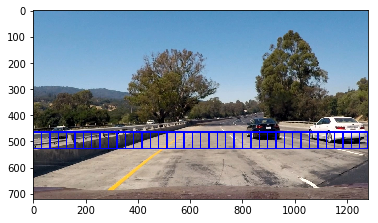

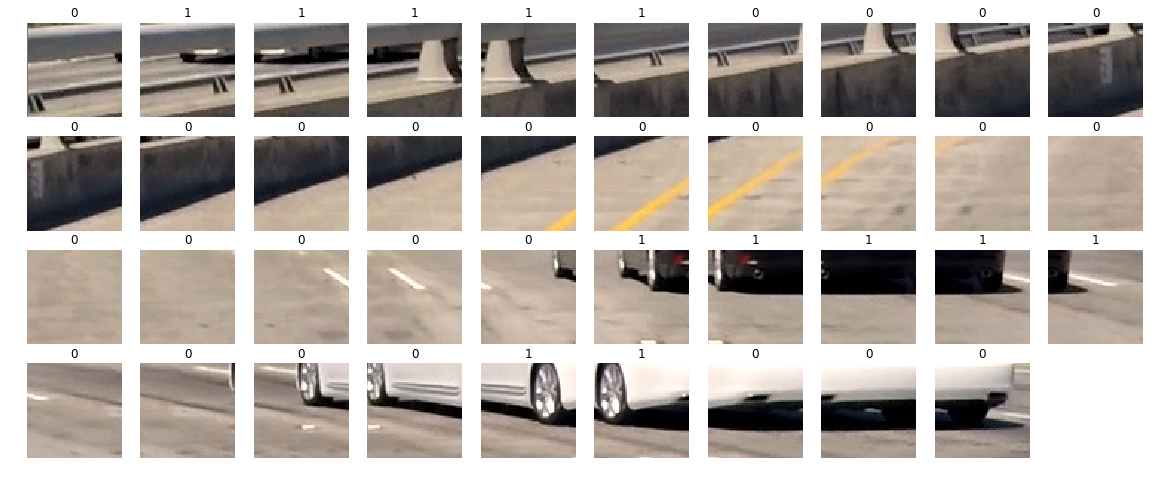

In [142]:
windows, boxes = get_windows(test_img, 496, 1.0, vis=True)
window_features = extract_features(windows, cspace=hog_parameters[best][0], orient=hog_parameters[best][1], 
                        pix_per_cell=hog_parameters[best][2], cell_per_block=hog_parameters[best][3], 
                        hog_channel='ALL', img_paths=False)

#window_features = X_scaler.transform(window_features)
print(np.shape(window_features))

window_predictions = svc.predict(window_features)
print(window_predictions)

fig, axs = plt.subplots(4,10, figsize=(20, 8))
axs = axs.ravel()
#print(boxes)

for i in range(40):
    axs[i].axis('off')
    if i< len(windows):
        axs[i].set_title(window_predictions[i])
        axs[i].imshow(windows[i])

(12, 576)
[1 0 0 0 0 0 0 0 0 0 0 0]


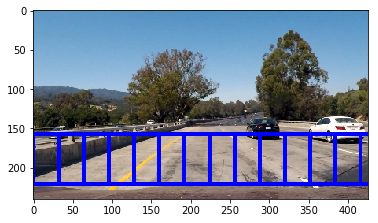

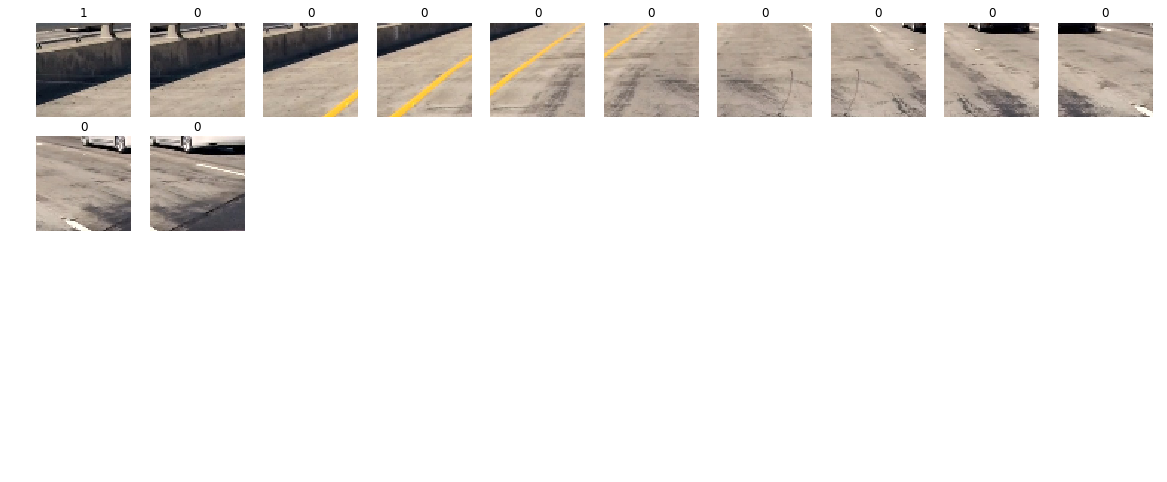

In [153]:
windows, boxes = get_windows(test_img, 568, 3.0, vis=True)
window_features = extract_features(windows, cspace=hog_parameters[best][0], orient=hog_parameters[best][1], 
                        pix_per_cell=hog_parameters[best][2], cell_per_block=hog_parameters[best][3], 
                        hog_channel='ALL', img_paths=False)

#window_features = X_scaler.transform(window_features)
print(np.shape(window_features))

window_predictions = svc.predict(window_features)
print(window_predictions)

fig, axs = plt.subplots(4,10, figsize=(20, 8))
axs = axs.ravel()
#print(boxes)

for i in range(40):
    axs[i].axis('off')
    if i< len(windows):
        axs[i].set_title(window_predictions[i])
        axs[i].imshow(windows[i])

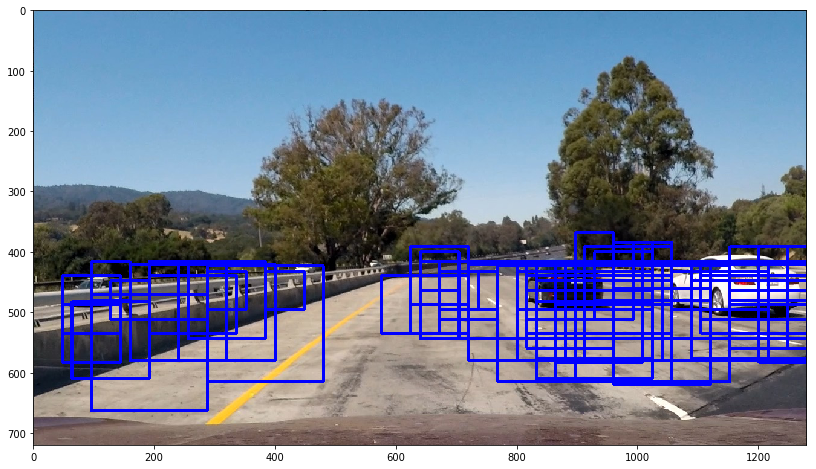

In [253]:
test_img = mpimg.imread('./test_images/test1.jpg')

window_dict = {0: [400, 1.0],
              1: [416, 1.0],
              2: [432, 1.0],
              3: [448, 1.0],
              4: [464, 1.0],
              5: [480, 1.0],
              6: [440, 1.5],
              7: [464, 1.5],
              8: [488, 1.5],
              9: [512, 1.5],
              10: [536, 1.5],
              11: [480, 2.0],
              12: [512, 2.0],
              13: [546, 2.0],
              14: [578, 2.0],
              15: [610, 2.0],
              16: [500, 2.5],
              17: [540, 2.5],
              18: [580, 2.5],
              19: [520, 3.0],
              20: [568, 3.0]}
windows = []
boxes = []
window_count = 0
for i in range(len(window_dict)):
    windows_i, boxes_i = get_windows(test_img, window_dict[i][0], window_dict[i][1], vis=False)
    window_count += len(windows_i)
    for window in windows_i:
        windows.append(window)
    for box in boxes_i:
        boxes.append(box)

window_features = extract_features(windows, cspace=hog_parameters[best][0], orient=hog_parameters[best][1], 
                        pix_per_cell=hog_parameters[best][2], cell_per_block=hog_parameters[best][3], 
                        hog_channel='ALL', img_paths=False)

window_predictions = svc.predict(window_features)

hits = []
draw_img = np.copy(test_img)

for i in range(len(window_predictions)):
    if window_predictions[i]:
        cv2.rectangle(draw_img, boxes[i][0], boxes[i][1], (0, 0, 255), 3)
        hits.append(boxes[i])


plt.figure(figsize=(20, 8))
plt.imshow(draw_img)

20


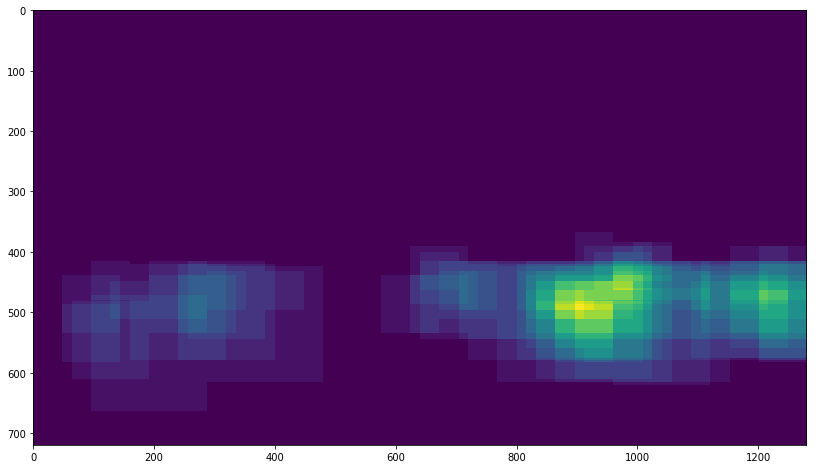

In [254]:
heatmap = np.zeros_like(test_img[:,:,0])
for hit_box in hits:
    heatmap[hit_box[0][1]:hit_box[1][1], hit_box[0][0]:hit_box[1][0]] += 1
    
plt.figure(figsize=(20, 8))
plt.imshow(heatmap)
print(np.max(heatmap))

2 cars in image


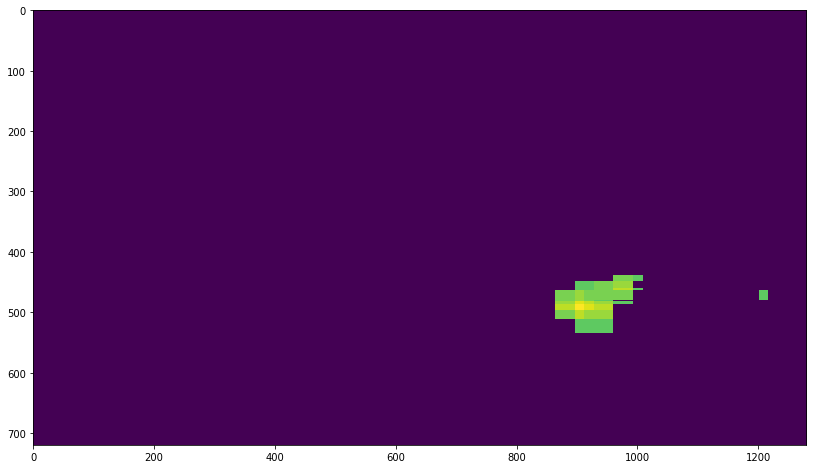

In [257]:
threshold = 14
heatmap[heatmap <= threshold] = 0
plt.figure(figsize=(20, 8))
plt.imshow(heatmap)
labels = label(heatmap)
print(labels[1], 'cars in image')


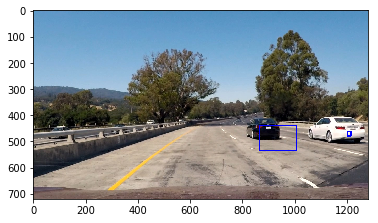

In [258]:
draw_img = np.copy(test_img)

for car in range(1, labels[1]+1):
    nonzero = (labels[0] == car).nonzero()
    # Identify x and y values of those pixels
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Define a bounding box based on min/max x and y
    bbox = [(np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy))]
    cv2.rectangle(draw_img, bbox[0], bbox[1], (0, 0, 255), 3)

plt.imshow(draw_img)
    

In [ ]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block):
    
    draw_img = np.copy(img)
    #img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HSV)
    
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_features = []
            hog_features.append(hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window])
            hog_features.append(hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window])
            hog_features.append(hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window])
            hog_features = [np.ravel(hog_features)]
            #hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            #hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            #hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            #hog_features = [np.hstack((hog_feat1, hog_feat2, hog_feat3))]
            X_scaler.transform(hog_features)
            #print(hog_features)
            test_prediction = svc.predict(hog_features)
            plt.imshow(img_tosearch[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window])
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img

In [ ]:
test_img = mpimg.imread('./test_images/test1.jpg')

ystart = 400
ystop = 656
scale = 1
orient = 12
pix_per_cell = 16
cell_per_block = 2

image = find_cars(test_img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block)
#plt.imshow(image)

In [ ]:
plt.imshow(image)